# Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features in a dataset while preserving the relevant information. It is used to address the curse of dimensionality, where datasets with a large number of features can become computationally expensive and lead to overfitting. Dimensionality reduction can also help to simplify the data and make it easier to visualize and interpret.

There are several techniques for dimensionality reduction. Let's take an overview of few popular ones.

## Principal Component Analysis

Principal component analysis (PCA) is a widely used technique for dimensionality reduction and feature extraction. It works by identifying the most important linear combinations of features that explain the majority of the variability in the dataset. The new features, or principal components, are uncorrelated and ordered by their importance.

The concept behind PCA (Principal Component Analysis) is to find the directions in the data that have the most variation and represent the data in a lower-dimensional space while retaining the most important information. The goal is to project the data onto a lower-dimensional space while minimizing the information loss as much as possible. This is achieved by finding the principal components of the data, which are the directions that have the largest variance. Each principal component is a linear combination of the original features, and the principal components are orthogonal to each other.

PCA works by computing the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors with the largest eigenvalues are selected as the principal components, which define the lower-dimensional space onto which the data is projected. The principal components can be sorted in descending order according to their corresponding eigenvalues, and the top k principal components can be selected to represent the data in a lower-dimensional space. Once the data is projected onto the principal components, new data can be represented by projecting it onto the same principal components and reconstructing the original data in the original feature space.

Here is how PCA works:

- **Standardize the data:** PCA requires that the data is standardized, i.e., each feature should have zero mean and unit variance.
- **Compute the covariance matrix:** PCA computes the covariance matrix of the standardized data. The covariance matrix describes the relationship between pairs of features.
- **Compute the eigenvectors and eigenvalues of the covariance matrix:** PCA computes the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions in which the data has the most variability, and the eigenvalues represent the amount of variability in each direction.
- **Select the principal components:** PCA selects the principal components by sorting the eigenvectors by their corresponding eigenvalues and selecting the top k eigenvectors. These k principal components capture the most important information in the data.
- **Transform the data:** PCA transforms the original data into a new set of features using the selected principal components. Each data point is projected onto the principal components, which results in a new set of features that are uncorrelated and ordered by their importance.

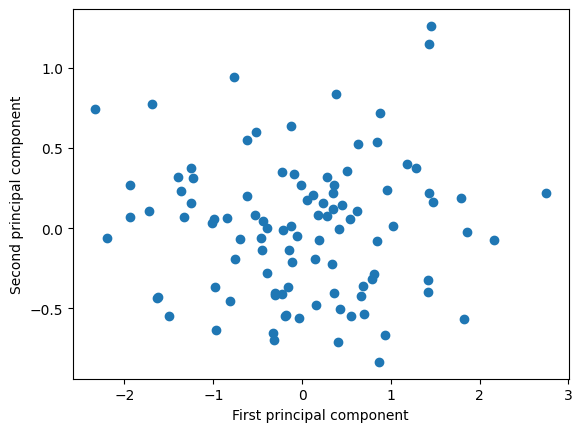

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)

x1 = np.random.normal(loc=0, scale=1, size=100)
x2 = 0.5 * x1 + np.random.normal(loc=0, scale=0.5, size=100)

# Create dataset
data = np.column_stack((x1, x2))

# Perform PCA using scikit-learn
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Analyze the results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

## Linear Discriminant Analysis (LDA)

LDA stands for Linear Discriminant Analysis. It is a supervised machine learning algorithm used for classification tasks. LDA is used to find a linear combination of features that best separates the classes in the data.

The concept behind LDA (Linear Discriminant Analysis) is to find a linear combination of features that best separates the classes in the data. The goal is to project the data onto a lower-dimensional space while maximizing the separation between the classes and minimizing the variation within each class. This is achieved by finding a set of vectors (called discriminants) that maximize the between-class scatter while minimizing the within-class scatter.

The within-class scatter measures the variation within each class, while the between-class scatter measures the separation between the classes. By maximizing the between-class scatter and minimizing the within-class scatter, LDA aims to find a projection of the data onto a lower-dimensional space where the classes are as separable as possible.

The projection is done by computing the eigenvectors and eigenvalues of the matrix product of the inverse of the within-class scatter matrix and the between-class scatter matrix. The eigenvectors with the highest eigenvalues are selected as the discriminants, which define the lower-dimensional space onto which the data is projected.

Once the data is projected onto the discriminants, new data can be classified by projecting it onto the same discriminants and assigning it to the class with the closest mean vector in the lower-dimensional space.

Here are the main steps involved in LDA:

- **Compute the mean vectors:** Compute the mean vector for each class. The mean vector is the average of all feature vectors in the class.
- **Compute the within-class scatter matrix:** Compute the within-class scatter matrix, which measures the variation within each class. It is computed by summing the scatter matrices for each class, where the scatter matrix for a class is the sum of the outer product of the deviation of each feature vector from the mean vector.
- **Compute the between-class scatter matrix:** Compute the between-class scatter matrix, which measures the separation between the classes. It is computed as the sum of the outer product of the deviation of each class mean vector from the overall mean vector.
- **Compute the eigenvalues and eigenvectors:** Compute the eigenvalues and eigenvectors of the matrix product of the inverse of the within-class scatter matrix and the between-class scatter matrix.
- **Sort the eigenvectors by decreasing eigenvalues:** Sort the eigenvectors by decreasing eigenvalues and select the k eigenvectors with the highest eigenvalues. These eigenvectors are the discriminants.
- **Project the data onto the discriminants:** Project the data onto the k discriminants to obtain the lower-dimensional representation of the data.
- **Classify new data:** To classify new data, project it onto the k discriminants and assign it to the class with the closest mean vector in the lower-dimensional space.

LDA has several advantages, such as being a linear method that can handle high-dimensional data and producing interpretable results. However, it requires that the classes be well-separated and normally distributed, and it can be sensitive to outliers.

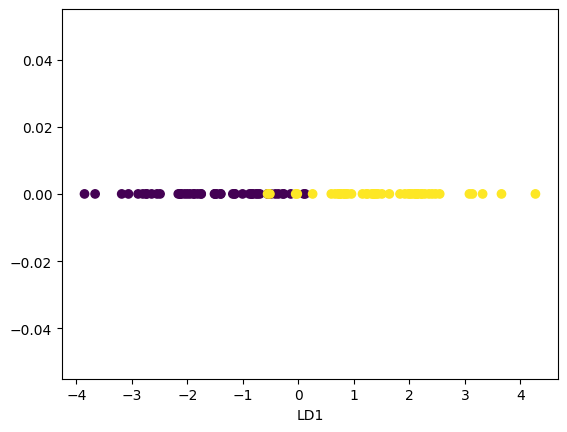

In [2]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

np.random.seed(42)

# Create dataset with two classes, each with two features, x1 and x2, and 100 samples
# Class 1
x1_c1 = np.random.normal(loc=0, scale=1, size=50)
x2_c1 = np.random.normal(loc=0, scale=1, size=50)

# Class 2
x1_c2 = np.random.normal(loc=2, scale=1, size=50)
x2_c2 = np.random.normal(loc=2, scale=1, size=50)

# Combine data
data = np.column_stack((np.concatenate((x1_c1, x1_c2)),
                        np.concatenate((x2_c1, x2_c2))))
labels = np.array([0]*50 + [1]*50)

# Perform LDA using scikit-learn
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(data, labels)
projected_data = lda.transform(data)

# Analyze the results
import matplotlib.pyplot as plt
plt.scatter(projected_data[:, 0], np.zeros_like(projected_data[:, 0]), c=labels)
plt.xlabel('LD1')
plt.show()

# t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique that is commonly used for visualizing high-dimensional data in a low-dimensional space, typically 2D or 3D. The technique was introduced in 2008 by Laurens van der Maaten and Geoffrey Hinton.

The goal of t-SNE is to preserve the pairwise similarity relationships between the data points in the original high-dimensional space while embedding them in a low-dimensional space. The pairwise similarity between two data points is measured by a Gaussian kernel that is centered on the two points and has a bandwidth that is determined by the perplexity hyperparameter.

t-SNE works by defining a probability distribution over pairs of high-dimensional objects, such that similar objects have a high probability of being picked and dissimilar objects have a low probability of being picked. It then defines a similar probability distribution over pairs of low-dimensional objects, and it tries to minimize the difference between these two distributions using a gradient descent algorithm.

In practice, t-SNE is often used for visualizing high-dimensional data such as images or text embeddings. It is able to capture complex relationships between the data points that may not be apparent in the original high-dimensional space. However, t-SNE is computationally intensive and may be slow to run on large datasets. It is also sensitive to the choice of hyperparameters such as the perplexity, and it may produce different visualizations for different runs on the same data.

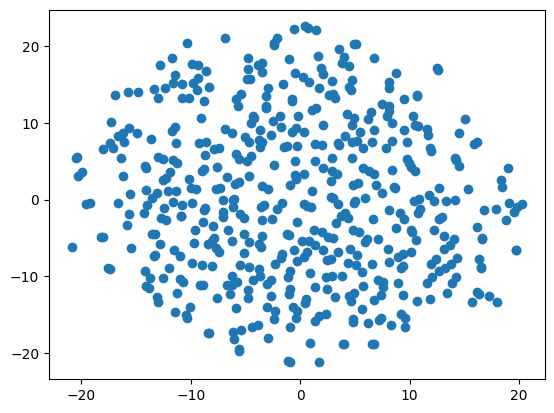

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create a custom dataset with 500 points and 10 dimensions
X = np.random.randn(500, 10)

# Initialize t-SNE with 2 output dimensions
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data to the lower-dimensional space
X_tsne = tsne.fit_transform(X)

# Visualize the data in the lower-dimensional space
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()